In [17]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import time
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pytz
from pylab import mpl, plt

In [18]:
if not mt5.initialize():
    print('initialize() falhou')
    mt5.shutdown()

In [19]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [20]:
ativo_analise = 'PETR4'
df_analise = mt5.copy_ticks_from(ativo_analise, datetime(2022, 1, 2),100000000, mt5.COPY_TICKS_ALL)
df_analise = pd.DataFrame(df_analise)
df_analise['time'] = pd.to_datetime(df_analise['time'], unit='s')
df_analise.drop(['flags', 'time_msc', 'volume_real'], axis = 1, inplace=True)
df_analise.set_index('time', inplace=True)
df_analise['M1000'] = ta.sma(df_analise['last'], length=1000)
df_analise['M5000'] = ta.sma(df_analise['last'], length=5000)
df_analise['M10000'] = ta.sma(df_analise['last'], length=10000)
df_analise

,bid,ask,last,volume,M1000,M5000,M10000
time,,,,,,,
2022-01-03 07:00:01,0.00,0.00,0.00,0,NaN,NaN,NaN
2022-01-03 07:00:08,28.41,28.55,0.00,0,NaN,NaN,NaN
2022-01-03 09:30:00,28.41,28.55,0.00,0,NaN,NaN,NaN
2022-01-03 09:45:00,32.71,28.41,0.00,0,NaN,NaN,NaN
2022-01-03 09:45:00,32.72,28.41,0.00,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-02-04 18:07:50,32.73,32.74,32.63,41800,32.74237,32.825600,32.820869
2022-02-04 18:07:50,32.62,32.66,32.63,41800,32.74224,32.825552,32.820842
2022-02-04 18:30:03,32.62,32.66,32.63,41800,32.74210,32.825502,32.820815


In [21]:
#inicialmente teste com 1000ticks
df_analise['Dist1k'] = df_analise['last']-df_analise['M1000'] 
df_analise['Dist5k'] = df_analise['last']-df_analise['M5000']
df_analise['Dist10k'] = df_analise['last']-df_analise['M10000']

In [22]:
df = df_analise.loc['2022-02-02 10:30:00' : '2022-02-02 16:30:00']
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 10:30:00,32.89,32.91,32.89,200,32.90409,32.864620,33.026324,-0.01409,0.025380,-0.136324
2022-02-02 10:30:00,32.89,32.91,32.89,100,32.90412,32.864558,33.026287,-0.01412,0.025442,-0.136287
2022-02-02 10:30:00,32.89,32.91,32.90,400,32.90416,32.864502,33.026251,-0.00416,0.035498,-0.126251
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90419,32.864442,33.026215,-0.00419,0.035558,-0.126215
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90421,32.864386,33.026179,-0.00421,0.035614,-0.126179
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:29:46,32.56,32.57,32.57,100,32.53109,32.475480,32.481078,0.03891,0.094520,0.088922
2022-02-02 16:29:52,32.56,32.57,32.56,100,32.53115,32.475510,32.481074,0.02885,0.084490,0.078926
2022-02-02 16:29:55,32.56,32.57,32.57,500,32.53122,32.475542,32.481071,0.03878,0.094458,0.088929


In [23]:
df = df[df['volume'] > 0]

In [24]:
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 10:30:00,32.89,32.91,32.89,200,32.90409,32.864620,33.026324,-0.01409,0.025380,-0.136324
2022-02-02 10:30:00,32.89,32.91,32.89,100,32.90412,32.864558,33.026287,-0.01412,0.025442,-0.136287
2022-02-02 10:30:00,32.89,32.91,32.90,400,32.90416,32.864502,33.026251,-0.00416,0.035498,-0.126251
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90419,32.864442,33.026215,-0.00419,0.035558,-0.126215
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90421,32.864386,33.026179,-0.00421,0.035614,-0.126179
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:29:46,32.56,32.57,32.57,100,32.53109,32.475480,32.481078,0.03891,0.094520,0.088922
2022-02-02 16:29:52,32.56,32.57,32.56,100,32.53115,32.475510,32.481074,0.02885,0.084490,0.078926
2022-02-02 16:29:55,32.56,32.57,32.57,500,32.53122,32.475542,32.481071,0.03878,0.094458,0.088929


In [25]:
#df = df[1000:101000]
df

,bid,ask,last,volume,M1000,M5000,M10000,Dist1k,Dist5k,Dist10k
time,,,,,,,,,,
2022-02-02 10:30:00,32.89,32.91,32.89,200,32.90409,32.864620,33.026324,-0.01409,0.025380,-0.136324
2022-02-02 10:30:00,32.89,32.91,32.89,100,32.90412,32.864558,33.026287,-0.01412,0.025442,-0.136287
2022-02-02 10:30:00,32.89,32.91,32.90,400,32.90416,32.864502,33.026251,-0.00416,0.035498,-0.126251
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90419,32.864442,33.026215,-0.00419,0.035558,-0.126215
2022-02-02 10:30:00,32.89,32.91,32.90,500,32.90421,32.864386,33.026179,-0.00421,0.035614,-0.126179
...,...,...,...,...,...,...,...,...,...,...
2022-02-02 16:29:46,32.56,32.57,32.57,100,32.53109,32.475480,32.481078,0.03891,0.094520,0.088922
2022-02-02 16:29:52,32.56,32.57,32.56,100,32.53115,32.475510,32.481074,0.02885,0.084490,0.078926
2022-02-02 16:29:55,32.56,32.57,32.57,500,32.53122,32.475542,32.481071,0.03878,0.094458,0.088929


In [26]:
def percentil(data, up=90, down=10):
    x = data
    array_x = np.array(x)
    percentil_up = np.percentile(array_x, up)
    percentil_down = np.percentile(array_x, down)
    
    return percentil_up, percentil_down

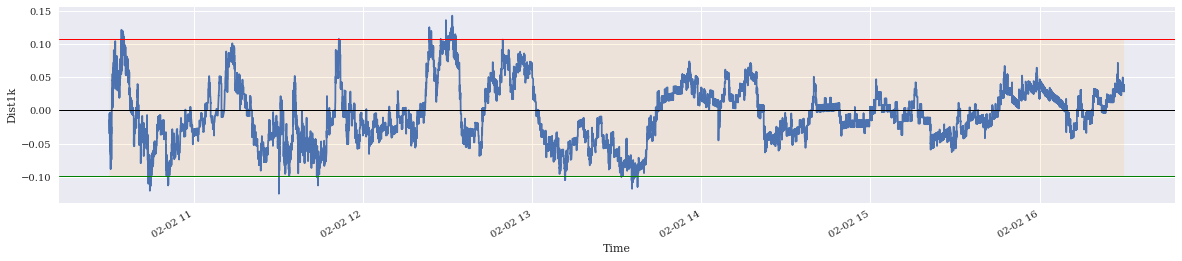

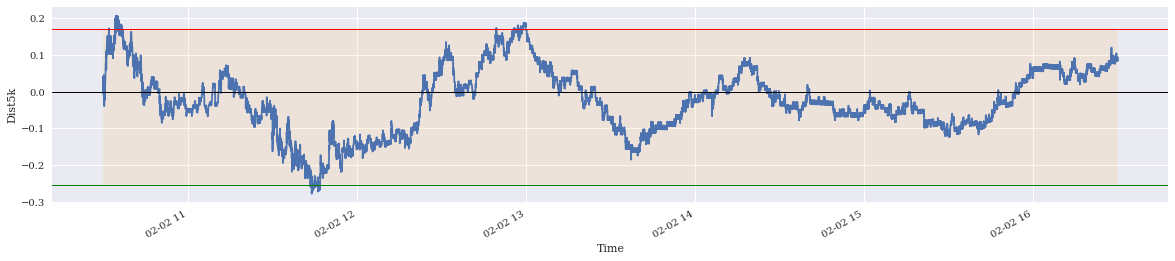

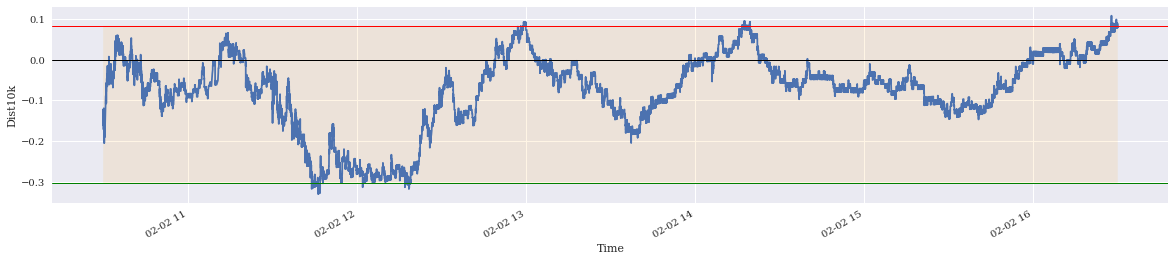

In [27]:
plt.rcParams['figure.figsize'] = (20,4)

per_dist1k = percentil(df['Dist1k'], up=99, down=1)
ax = df['Dist1k'].plot()
ax.fill_between(df.index, per_dist1k[0], per_dist1k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist1k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist1k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist1k')
plt.show()

per_dist5k = percentil(df['Dist5k'], up=99, down=1)
ax = df['Dist5k'].plot()
ax.fill_between(df.index, per_dist5k[0], per_dist5k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist5k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist5k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist5k')
plt.show()

per_dist10k = percentil(df['Dist10k'], up=99, down=1)
ax = df['Dist10k'].plot()
ax.fill_between(df.index, per_dist10k[0], per_dist10k[1],facecolor= 'orange', alpha= 0.1)
plt.axhline(per_dist10k[0], color="red", lw=1.0)
plt.axhline(0, color="black", lw=1.0)
plt.axhline(per_dist10k[1], color="green", lw=1.0)
plt.xlabel('Time')
plt.ylabel('Dist10k')
plt.show()

In [28]:
df['Dist1k'].describe()

count    27687.000000
mean        -0.006654
std          0.046150
min         -0.125390
25%         -0.039475
50%         -0.011970
75%          0.026495
max          0.142790
Name: Dist1k, dtype: float64

In [29]:
df['Dist5k'].describe()

count    27687.000000
mean        -0.030898
std          0.096895
min         -0.277852
25%         -0.098896
50%         -0.026852
75%          0.042712
max          0.207148
Name: Dist5k, dtype: float64

In [30]:
df['Dist10k'].describe()

count    27687.000000
mean        -0.081867
std          0.100892
min         -0.329734
25%         -0.132307
50%         -0.062913
75%         -0.007205
max          0.108150
Name: Dist10k, dtype: float64